In [1]:
# !pip install yellowbrick

In [2]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# import cv2

from sklearn.feature_selection import SelectFromModel

from statsmodels.stats.outliers_influence import variance_inflation_factor

/var/folders/lx/fr986f350ps4brcwrmql5cf00000gn/T/ipykernel_79087/2025114510.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import seaborn as sns

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# airbnb = pd.read_csv('/content/drive/MyDrive/6025 - Final Project/airbnb_listings_austin.csv')
airbnb = pd.read_csv('/Users/helenas/Desktop/Predictive Analytics/Homework/Final Project/airbnb_listings_austin.csv')
airbnb.head()

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,NaN,Unfortunately there is no convenient public tr...,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,NaN,"Bike, Bus, Metrorail, etc. you name it we've g...",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict


# Questions
1. Is it okay to fill Review_Ratings if 35% of values are missing?
2. "How important are guest reviews and ratings?" - Important to the price?
3. Can we assume missing values are 0?

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5835 non-null   int64  
 1   listing_url                  5835 non-null   object 
 2   name                         5835 non-null   object 
 3   summary                      5373 non-null   object 
 4   space                        4475 non-null   object 
 5   description                  5832 non-null   object 
 6   experiences_offered          5835 non-null   object 
 7   neighborhood_overview        3572 non-null   object 
 8   notes                        2412 non-null   object 
 9   transit                      3492 non-null   object 
 10  host_id                      5835 non-null   int64  
 11  host_name                    5820 non-null   object 
 12  host_since                   5820 non-null   object 
 13  host_location     

# Let's take a look at the null values.
### We are particularly interested in columns with >20% missing values as we will most likely need to drop those

In [7]:
missing_pct = airbnb.isna().sum()/airbnb.shape[0]
missing_df = pd.DataFrame(missing_pct).reset_index()
missing_df.columns = ['column_name', 'missing_pct']

missing_df[missing_df['missing_pct']>.2]

,column_name,missing_pct
4,space,0.233076
7,neighborhood_overview,0.387832
8,notes,0.586632
9,transit,0.401542
14,host_about,0.318937
15,host_response_time,0.284147
16,host_response_rate,0.284147
31,square_feet,0.948243
33,weekly_price,0.618338
34,security_deposit,0.525278


## These columns have <20% missing values but >0. We will need to fill these columns if we decide they might be useful in our model.

In [8]:
missing_df[(missing_df['missing_pct']<=0.2) & (missing_df['missing_pct']!=0)]

,column_name,missing_pct
3,summary,0.079177
5,description,0.000514
11,host_name,0.002571
12,host_since,0.002571
13,host_location,0.004284
17,host_is_superhost,0.002571
18,host_listings_count,0.002571
19,host_has_profile_pic,0.002571
20,host_identity_verified,0.002571
21,neighbourhood,0.177378


# Impute Missing Values
We decided to drop the summary, host_name, host_since, and host_location as these columns are either not useful or redundant (summary is very similar to description).

- host_is_superhost will be filled with f (No)
- host_listing_count will be filled with median (1)
- host_has_profile_pic will be filled with f (No)
- host_identity_verified will be filled with f (No)
- bathrooms will be filled with median (1)
- bedrooms will be filled with median (1)
- beds will be filled with median (2)

In [9]:
airbnb['host_is_superhost'].fillna('f', inplace = True)

airbnb['host_listings_count'].fillna(1, inplace = True)

airbnb['host_has_profile_pic'].fillna('f', inplace = True)

airbnb['host_identity_verified'].fillna('f', inplace = True)

airbnb['bathrooms'].fillna(1, inplace = True)

airbnb['bedrooms'].fillna(1, inplace = True)

airbnb['beds'].fillna(2, inplace = True)

In [10]:
airbnb['security_deposit'].fillna(0, inplace = True)

airbnb['cleaning_fee'].fillna(0, inplace = True)

In [11]:
airbnb.isna().sum() / airbnb.shape[0]

id                             0.000000
listing_url                    0.000000
name                           0.000000
summary                        0.079177
space                          0.233076
description                    0.000514
experiences_offered            0.000000
neighborhood_overview          0.387832
notes                          0.586632
transit                        0.401542
host_id                        0.000000
host_name                      0.002571
host_since                     0.002571
host_location                  0.004284
host_about                     0.318937
host_response_time             0.284147
host_response_rate             0.284147
host_is_superhost              0.000000
host_listings_count            0.000000
host_has_profile_pic           0.000000
host_identity_verified         0.000000
neighbourhood                  0.177378
city                           0.000000
property_type                  0.000000
room_type                      0.000000


# Create Additional Columns of Interest
There are four additional columns we will create that we felt might give important insights.
* filled: (int) counts how many text columns are filled out of the total 8. We thought listings with more informations may lead to a higher booking rate.
* mostly_filled: (binary)  True if 'filled' >= 5; False if 'filled' < 5

* availability_90_pct: percentage of next 90 days that the property is available
* booked: (binary) 1 if availability_90_pct is less than .4, 0 if greater
* neighborhood_2:

### Create 'price_per_person'

In [12]:
airbnb['price'] = airbnb['price'].str.replace('$', '').str.replace(',', '').astype('float')

In [13]:
airbnb['price_per_person'] = airbnb['price']/airbnb['accommodates']

### Create 'availability_90_pct' column by dividing 'availability_90' by 90

In [14]:
airbnb['availability_90_pct'] = airbnb['availability_90'] / 90
airbnb[['availability_90','availability_90_pct']]

,availability_90,availability_90_pct
0,0,0.000000
1,89,0.988889
2,90,1.000000
3,90,1.000000
4,87,0.966667
...,...,...
5830,65,0.722222
5831,62,0.688889
5832,89,0.988889
5833,90,1.000000


### Create 'booked' column. 1 if 'availability_90_pct' < .4, 0 if >= .4

In [15]:
airbnb['booked'] = airbnb['availability_90_pct'].apply(lambda x: 1 if x < .4 else 0)
airbnb[['availability_90', 'availability_90_pct', 'booked']]

,availability_90,availability_90_pct,booked
0,0,0.000000,1
1,89,0.988889,0
2,90,1.000000,0
3,90,1.000000,0
4,87,0.966667,0
...,...,...,...
5830,65,0.722222,0
5831,62,0.688889,0
5832,89,0.988889,0
5833,90,1.000000,0


### Create 'filled' and 'mostly_filled' column
This will look at the 8 description columns and return how many are filled and is it mostly filled
- 1 (mostly filled): 5 or more fields filled
- 0 (mostly blank): less than 5 fields filled

In [16]:
descriptions = airbnb[['summary', 'space', 'description','neighborhood_overview', 'notes', 'transit', 'host_about', 'amenities']].copy()
descriptions['filled'] = descriptions.apply(lambda x: x.count(), axis = 1)
airbnb = pd.merge(airbnb, descriptions['filled'], right_index = True, left_index=True)


airbnb['mostly_filled'] = airbnb['filled'].apply(lambda x:1 if x>4 else 0)
airbnb.head()

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,price_per_person,availability_90_pct,booked,filled,mostly_filled
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,NaN,Unfortunately there is no convenient public tr...,...,10.0,10.0,10.0,f,moderate,50.000000,0.000000,1,7,1
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,NaN,"Bike, Bus, Metrorail, etc. you name it we've g...",...,NaN,NaN,NaN,f,moderate,49.500000,0.988889,0,7,1
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,NaN,NaN,NaN,f,flexible,50.000000,1.000000,0,4,0
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,NaN,NaN,NaN,f,flexible,50.000000,1.000000,0,4,0
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,NaN,NaN,...,NaN,NaN,NaN,f,strict,99.833333,0.966667,0,5,1


In [17]:
airbnb['mostly_filled'].value_counts()

1    4258
0    1577
Name: mostly_filled, dtype: int64

# Change Data Type

In [18]:
airbnb.dtypes

id                               int64
listing_url                     object
name                            object
summary                         object
space                           object
description                     object
experiences_offered             object
neighborhood_overview           object
notes                           object
transit                         object
host_id                          int64
host_name                       object
host_since                      object
host_location                   object
host_about                      object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_listings_count            float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
city                            object
property_type                   object
room_type                       object
accommodates             

In [19]:
airbnb['extra_people'] = airbnb['extra_people'].str.replace('$', '').astype('float')

In [20]:
airbnb['property_type'] = airbnb['property_type'].astype('category')
airbnb['room_type'] = airbnb['room_type'].astype('category')
airbnb['bed_type'] = airbnb['bed_type'].astype('category')
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].astype('category')

In [21]:
airbnb['instant_bookable'] = airbnb['instant_bookable'].astype('bool')
airbnb['booked'] = airbnb['booked'].astype('bool')
airbnb['mostly_filled'] = airbnb['mostly_filled'].astype('bool')

airbnb['host_is_superhost'] = airbnb['host_is_superhost'].apply(lambda x: 0 if x == 'f' else 1)
airbnb['host_is_superhost'] = airbnb['host_is_superhost'].astype('bool')

airbnb['host_has_profile_pic'] = airbnb['host_has_profile_pic'].apply(lambda x: 0 if x == 'f' else 1)
airbnb['host_has_profile_pic'] = airbnb['host_has_profile_pic'].astype('bool')

airbnb['host_identity_verified'] = airbnb['host_identity_verified'].apply(lambda x: 0 if x == 'f' else 1)
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].astype('bool')

In [22]:
airbnb['security_deposit'] = airbnb['security_deposit'].str.replace('$', '')
airbnb['security_deposit'] = airbnb['security_deposit'].str.replace(',', '')
airbnb['security_deposit'] = airbnb['security_deposit'].str.strip('.00 ')
airbnb['security_deposit'] = airbnb['security_deposit'].astype('float')

In [23]:
airbnb['cleaning_fee'] = airbnb['cleaning_fee'].str.replace('$', '').str.strip('.00 ').astype('float')

# Drop Unnecessary Columns

Need to create the description filled column before dropping

List of columns dropped

In [24]:
airbnb.drop(columns=['id', 'listing_url', 'name', 'summary', 'experiences_offered', 'neighborhood_overview', 
                     'neighbourhood', 'notes', 'transit', 'host_id', 'host_name', 'host_since', 'host_location', 
                     'host_about', 'host_response_time', 'host_response_rate', 'city', 'square_feet', 'weekly_price', 
                     'has_availability', 'instant_bookable'], inplace = True)

# Copy of Data frame for modeling

In [25]:
df1 = airbnb.drop(columns = ['space', 'description', 'amenities', 'review_scores_rating', 'review_scores_accuracy', 
                             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                             'review_scores_location', 'review_scores_value', 'filled'])

df1['security_deposit'].fillna(0, inplace = True)
df1['cleaning_fee'].fillna(0, inplace = True)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   host_is_superhost       5835 non-null   bool    
 1   host_listings_count     5835 non-null   float64 
 2   host_has_profile_pic    5835 non-null   bool    
 3   host_identity_verified  5835 non-null   bool    
 4   property_type           5835 non-null   category
 5   room_type               5835 non-null   category
 6   accommodates            5835 non-null   int64   
 7   bathrooms               5835 non-null   float64 
 8   bedrooms                5835 non-null   float64 
 9   beds                    5835 non-null   float64 
 10  bed_type                5835 non-null   category
 11  price                   5835 non-null   float64 
 12  security_deposit        5835 non-null   float64 
 13  cleaning_fee            5835 non-null   float64 
 14  guests_included         

# Exploratory Analysis


---


How important are guest ratings and reviews?

What can a host do to improve these ratings?

## Begin with Correlation Heat map

In [26]:
num_df = airbnb.select_dtypes(include=np.number)

num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          5835 non-null   float64
 1   accommodates                 5835 non-null   int64  
 2   bathrooms                    5835 non-null   float64
 3   bedrooms                     5835 non-null   float64
 4   beds                         5835 non-null   float64
 5   price                        5835 non-null   float64
 6   security_deposit             2770 non-null   float64
 7   cleaning_fee                 3587 non-null   float64
 8   guests_included              5835 non-null   int64  
 9   extra_people                 5835 non-null   float64
 10  minimum_nights               5835 non-null   int64  
 11  availability_30              5835 non-null   int64  
 12  availability_60              5835 non-null   int64  
 13  availability_90   

## Decided to drop some redundant variables

In [27]:
num_df.drop(columns=['availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], inplace = True)
num_df.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,price_per_person,availability_90_pct,filled
count,5835.000000,5835.000000,5835.000000,5835.000000,5835.000000,5835.000000,2770.000000,3587.000000,5835.000000,5835.000000,5835.000000,5835.000000,3789.000000,5835.000000,5835.000000,5835.000000
mean,11.739332,4.388175,1.475835,1.737961,2.211482,286.182177,19.959928,30.299136,1.880548,13.585775,2.101799,10.794687,95.435735,63.847382,0.630144,5.992288
std,55.089746,2.689056,0.772735,1.136422,1.647815,403.231943,70.727460,43.574817,1.773406,29.638225,5.584971,25.405596,7.260422,59.975073,0.394915,1.760548
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,95.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,93.000000,30.000000,0.233333,4.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,175.000000,5.000000,9.000000,1.000000,0.000000,2.000000,2.000000,98.000000,47.500000,0.811111,6.000000
75%,2.000000,6.000000,2.000000,2.000000,3.000000,325.000000,15.000000,35.000000,2.000000,20.000000,2.000000,9.000000,100.000000,75.000000,0.988889,8.000000
max,339.000000,16.000000,8.000000,10.000000,16.000000,10000.000000,1899.000000,385.000000,16.000000,500.000000,365.000000,314.000000,100.000000,1000.000000,1.000000,8.000000


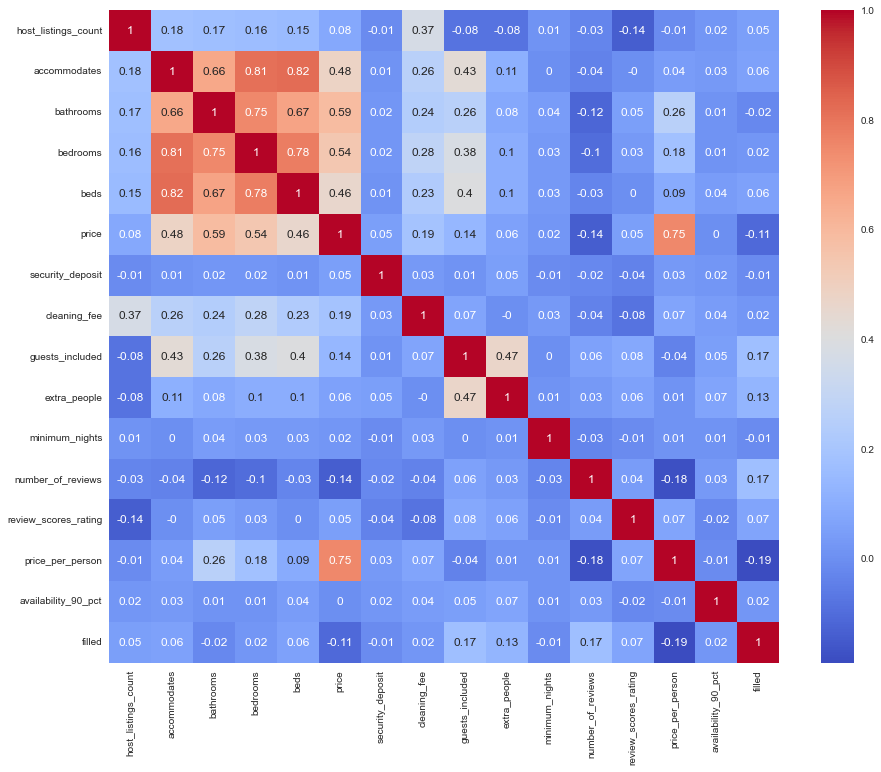

In [28]:
# Compute correlations
cormat = num_df.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (15,12))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

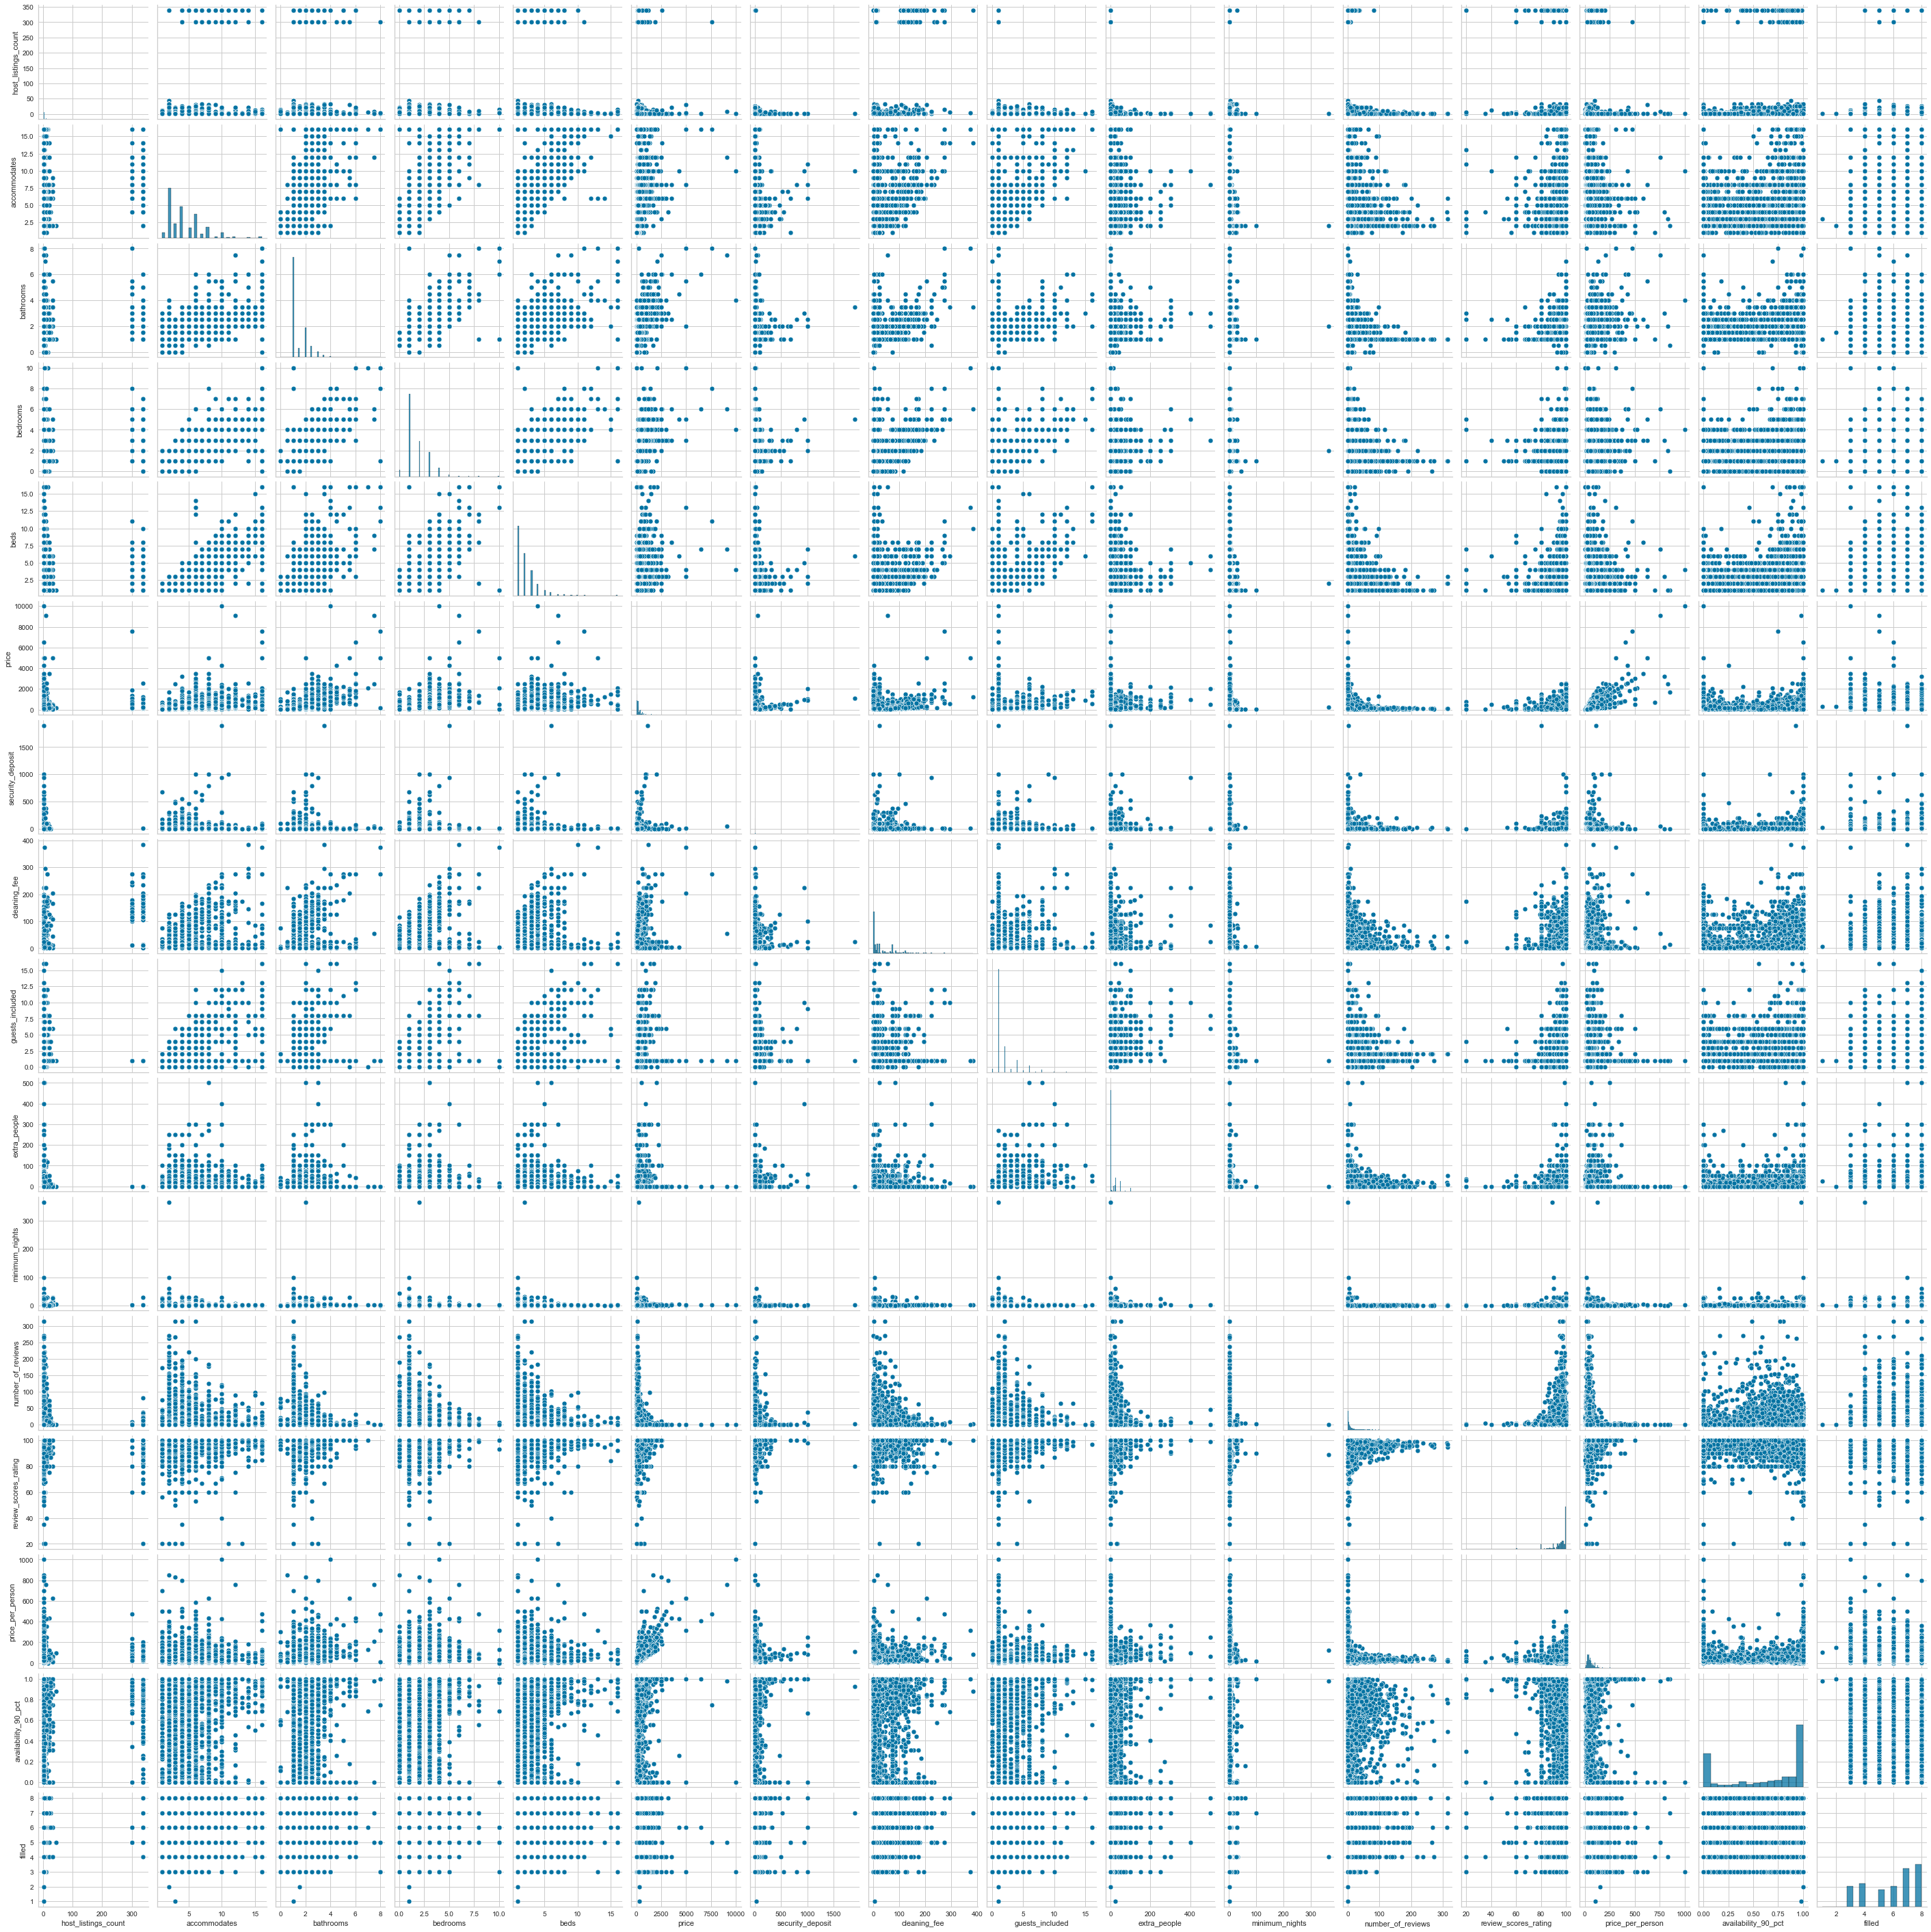

In [29]:
# Create scatterplot matrix
sns.pairplot(num_df.iloc[:,:16])
plt.show()

# Review Score V.S. Price

In [30]:
df_score = airbnb[['price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

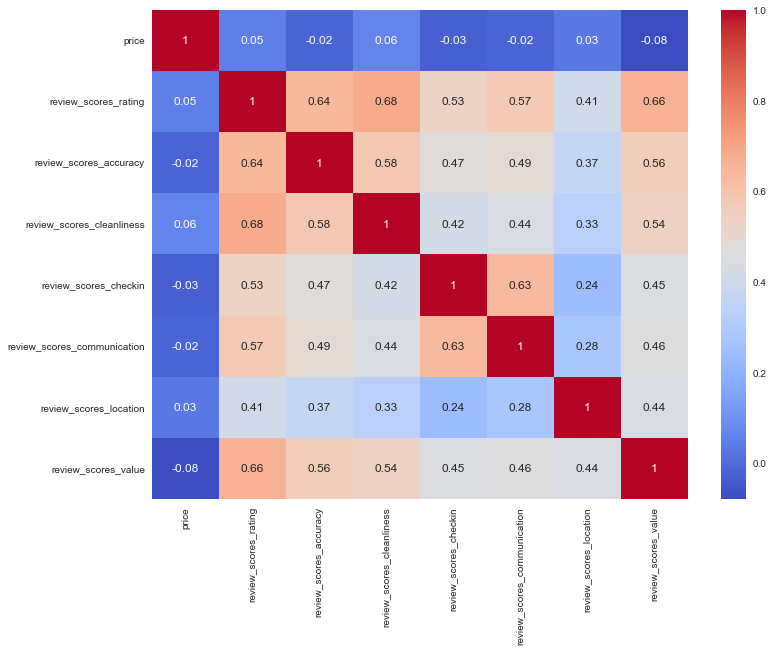

In [31]:
cormat = df_score.corr()
cormat = cormat.round(2)

plt.figure(figsize = (12,9))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Price by Categorical Variables

In [32]:
df1.select_dtypes(include = ['category'])

,property_type,room_type,bed_type,cancellation_policy
0,House,Private room,Real Bed,moderate
1,Camper/RV,Private room,Futon,moderate
2,House,Private room,Real Bed,flexible
3,House,Private room,Real Bed,flexible
4,House,Entire home/apt,Real Bed,strict
...,...,...,...,...
5830,Apartment,Entire home/apt,Real Bed,strict
5831,Condominium,Private room,Real Bed,moderate
5832,House,Entire home/apt,Real Bed,strict
5833,Apartment,Shared room,Real Bed,flexible


In [33]:
print(df1.groupby('property_type')['price'].agg('mean'))

property_type
Apartment          205.548248
Bed & Breakfast    114.324324
Boat                95.000000
Bungalow           142.333333
Cabin              110.176471
Camper/RV          131.411765
Chalet             155.000000
Condominium        246.830189
Earth House        111.500000
House              336.183662
Hut                 35.000000
Loft               235.987952
Other              389.319149
Tent                18.818182
Tipi                40.000000
Townhouse          220.947368
Treehouse          264.285714
Villa              392.571429
Name: price, dtype: float64


property_type
Apartment          205.548248
Bed & Breakfast    114.324324
Boat                95.000000
Bungalow           142.333333
Cabin              110.176471
Camper/RV          131.411765
Chalet             155.000000
Condominium        246.830189
Earth House        111.500000
House              336.183662
Hut                 35.000000
Loft               235.987952
Other              389.319149
Tent                18.818182
Tipi                40.000000
Townhouse          220.947368
Treehouse          264.285714
Villa              392.571429
Name: price, dtype: float64


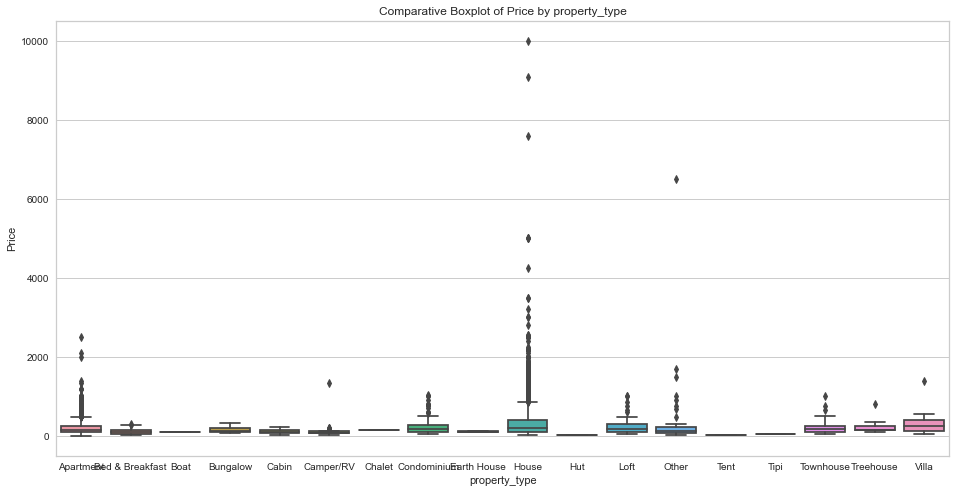

In [34]:
# Examine dummy variable: Look at price vs property_type

print(df1.groupby('property_type')['price'].agg('mean'))

plt.figure(figsize = (16,8))
sns.boxplot(data = df1,
            x = "property_type",
            y = "price")

# Add labels and a title
plt.xlabel("property_type")
plt.ylabel("Price")
plt.title("Comparative Boxplot of Price by property_type")

# Show the plot
plt.show()

room_type
Entire home/apt    364.130049
Private room       109.021186
Shared room         92.699187
Name: price, dtype: float64


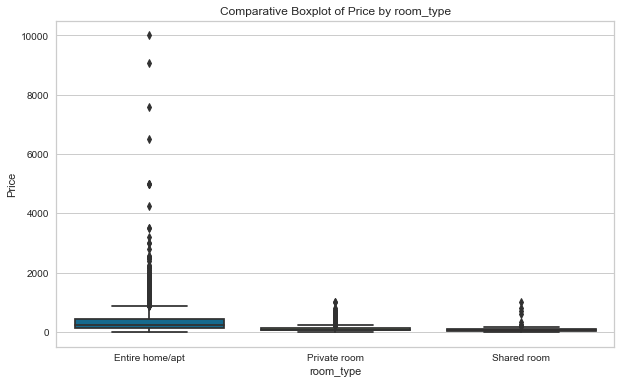

In [35]:
# Examine dummy variable: Look at price vs room_type

print(df1.groupby('room_type')['price'].agg('mean'))

plt.figure(figsize = (10,6))
sns.boxplot(data = df1,
            x = "room_type",
            y = "price")

# Add labels and a title
plt.xlabel("room_type")
plt.ylabel("Price")
plt.title("Comparative Boxplot of Price by room_type")

# Show the plot
plt.show()

bed_type
Airbed           116.060976
Couch            107.875000
Futon             94.743243
Pull-out Sofa    105.272727
Real Bed         292.639801
Name: price, dtype: float64


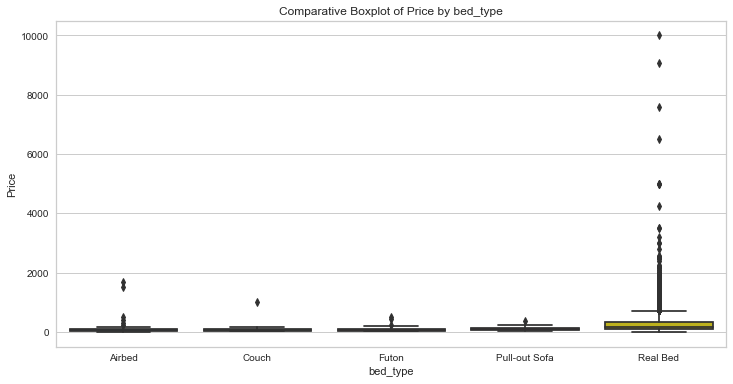

In [36]:
# Examine dummy variable: Look at price vs room_type

print(df1.groupby('bed_type')['price'].agg('mean'))

plt.figure(figsize = (12,6))
sns.boxplot(data = df1,
            x = "bed_type",
            y = "price")

# Add labels and a title
plt.xlabel("bed_type")
plt.ylabel("Price")
plt.title("Comparative Boxplot of Price by bed_type")

# Show the plot
plt.show()

cancellation_policy
flexible           258.847756
moderate           220.286364
no_refunds         350.000000
strict             348.231655
super_strict_30    346.666667
Name: price, dtype: float64


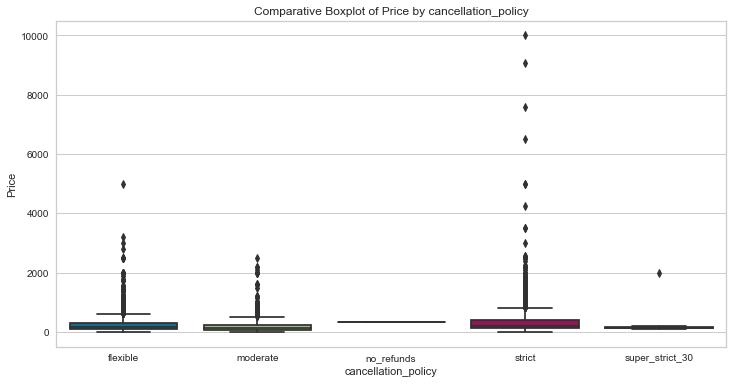

In [37]:
# Examine dummy variable: Look at price vs room_type

print(df1.groupby('cancellation_policy')['price'].agg('mean'))

plt.figure(figsize = (12,6))
sns.boxplot(data = df1,
            x = "cancellation_policy",
            y = "price")

# Add labels and a title
plt.xlabel("cancellation_policy")
plt.ylabel("Price")
plt.title("Comparative Boxplot of Price by cancellation_policy")

# Show the plot
plt.show()

---
# Build Linear Regression Model
---

## Model 1: Full model

In [38]:
df1['host_is_superhost'] = df1['host_is_superhost'].astype('int')
df1['host_has_profile_pic'] = df1['host_has_profile_pic'].astype('int')
df1['host_identity_verified'] = df1['host_identity_verified'].astype('int')
df1['booked'] = df1['booked'].astype('int')
df1['mostly_filled'] = df1['mostly_filled'].astype('int')

df1 = df1.drop('price_per_person',axis = 1)

In [39]:
# Fit full regression
X = df1.drop(columns=['price'])
# Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns = ['property_type','room_type','bed_type','cancellation_policy'], drop_first = True)

y = df1['price']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     87.04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:09:21   Log-Likelihood:                -41726.
No. Observations:                5835   AIC:                         8.355e+04
Df Residuals:                    5787   BIC:                         8.387e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [40]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)


                               Variable         VIF
0                                 const  344.318797
1                     host_is_superhost    1.237235
2                   host_listings_count    1.312674
3                  host_has_profile_pic    1.010540
4                host_identity_verified    1.140018
5                          accommodates    4.629389
6                             bathrooms    2.527222
7                              bedrooms    4.507059
8                                  beds    3.755560
9                      security_deposit    1.018486
10                         cleaning_fee    1.352602
11                      guests_included    1.733241
12                         extra_people    1.332351
13                       minimum_nights    1.012391
14                      availability_30   14.839539
15                      availability_60   48.698939
16                      availability_90         inf
17                     availability_365    2.154760
18          

## Model 2: Stepwise selection

In [41]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [42]:
# Display variables selected by the automated Forward-backward method

selected_features  = stepwise_selection(X, y)
print("---" * 12)
print('resulting features:')
print(selected_features)

Add  accommodates with p-value 0.0000
Add  bathrooms with p-value 0.0000
Add  const with p-value 0.0000
Add  bedrooms with p-value 0.0000
Add  host_identity_verified with p-value 0.0000
Add  mostly_filled with p-value 0.0000
Add  room_type_Private room with p-value 0.0000
Add  guests_included with p-value 0.0000
Add  number_of_reviews with p-value 0.0000
Add  extra_people with p-value 0.0000
Add  property_type_Other with p-value 0.0001
Add  room_type_Shared room with p-value 0.0002
Add  availability_30 with p-value 0.0007
Add  booked with p-value 0.0000
Add  property_type_Tent with p-value 0.0021
Add  cancellation_policy_moderate with p-value 0.0029
Add  host_listings_count with p-value 0.0017
Add  property_type_Townhouse with p-value 0.0054
Add  host_is_superhost with p-value 0.0073
------------------------------------
resulting features:
['accommodates', 'bathrooms', 'const', 'bedrooms', 'host_identity_verified', 'mostly_filled', 'room_type_Private room', 'guests_included', 'number_o

In [43]:
# Fit stepwise regression
X = X[['accommodates', 'bathrooms', 'bedrooms', 'host_identity_verified', 'mostly_filled', 'room_type_Private room', 
       'guests_included', 'number_of_reviews', 'extra_people', 'room_type_Shared room', 'availability_30', 'booked', 
       'property_type_Tent', 'cancellation_policy_moderate', 'host_listings_count', 'property_type_Townhouse', 
       'host_is_superhost']]
X = sm.add_constant(X)
y = df1['price']
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:09:27   Log-Likelihood:                -41749.
No. Observations:                5835   AIC:                         8.353e+04
Df Residuals:                    5817   BIC:                         8.365e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

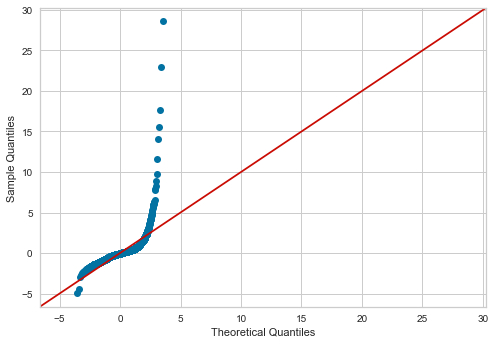

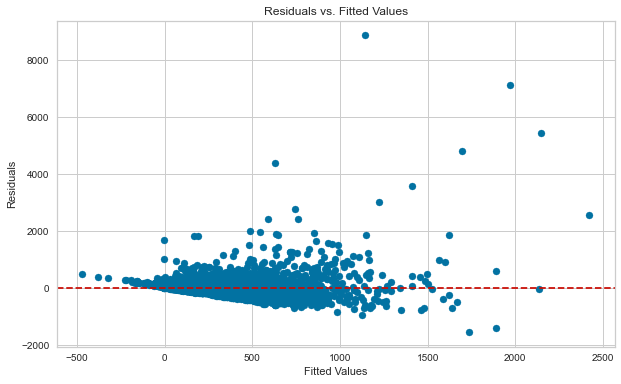

In [44]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit = True, line = '45')
plt.show()

# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y = 0, color = 'r', linestyle = '--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [45]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                        Variable        VIF
0                          const  24.019749
1                   accommodates   3.519604
2                      bathrooms   2.464915
3                       bedrooms   3.876901
4         host_identity_verified   1.110501
5                  mostly_filled   1.130158
6         room_type_Private room   1.385751
7                guests_included   1.682118
8              number_of_reviews   1.240408
9                   extra_people   1.316428
10         room_type_Shared room   1.057004
11               availability_30   2.898235
12                        booked   2.919154
13            property_type_Tent   1.055119
14  cancellation_policy_moderate   1.039314
15           host_listings_count   1.122958
16       property_type_Townhouse   1.004264
17             host_is_superhost   1.187612


## Model 3: Square transformation of y

In [46]:
# Fit regression
X = X[['accommodates', 'bathrooms', 'bedrooms', 'host_identity_verified', 'mostly_filled', 'room_type_Private room', 
       'guests_included', 'number_of_reviews', 'extra_people', 'room_type_Shared room', 'availability_30', 'booked', 
       'property_type_Tent', 'cancellation_policy_moderate', 'host_listings_count', 'property_type_Townhouse', 
       'host_is_superhost']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     455.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:09:28   Log-Likelihood:                -17799.
No. Observations:                5835   AIC:                         3.563e+04
Df Residuals:                    5817   BIC:                         3.575e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

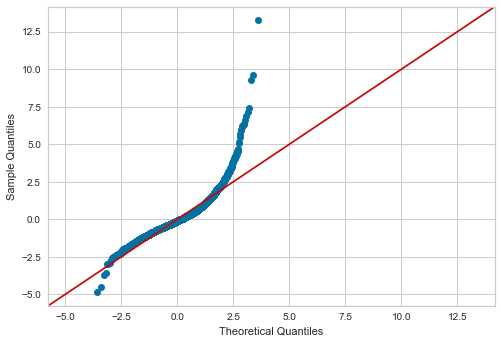

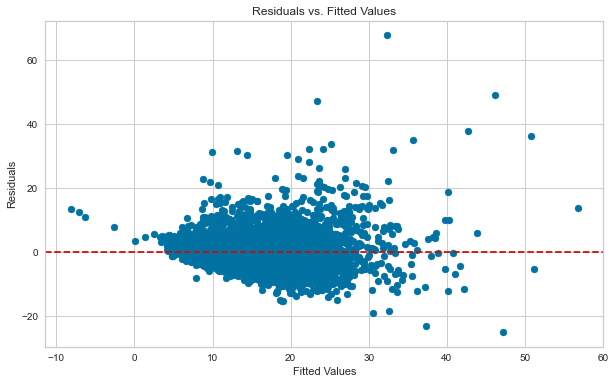

In [47]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit = True, line = '45')
plt.show()

# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y = 0, color = 'r', linestyle = '--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

## Model 4: Z-score with square y

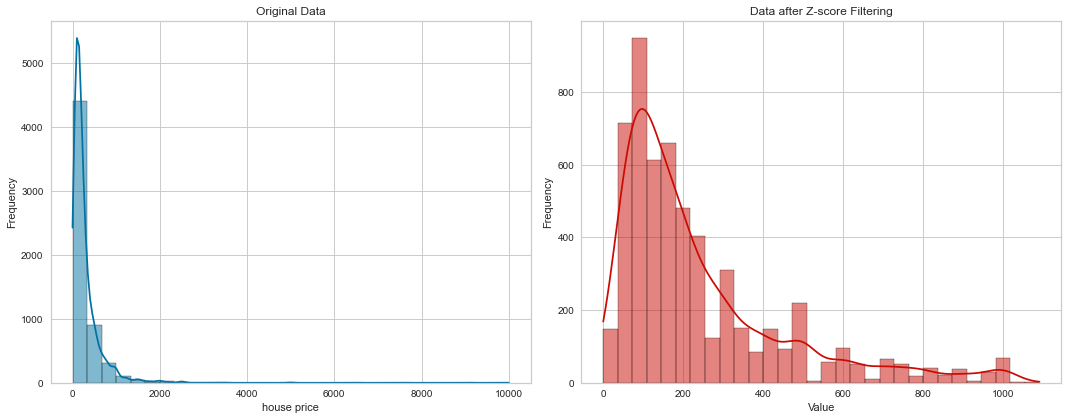

In [48]:
from scipy.stats import zscore
# Calculate Z-scores
z_scores = zscore(df1['price'])
# Get boolean array indicating the presence of outliers
# Here, we consider data points with Z-scores > 2 or < -2 as outliers
outliers = np.where((z_scores > 2) | (z_scores < -2))
# Filter out the outliers
filtered_data = df1[~(z_scores > 2) | (z_scores < -2)]
# Plotting original data and filtered data
plt.figure(figsize=(15, 6))
# Original Data
plt.subplot(1, 2, 1)
sns.histplot(df1['price'], kde=True, bins=30)
plt.title('Original Data')
plt.xlabel('house price')
plt.ylabel('Frequency')
# Filtered Data
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['price'], kde=True, bins=30, color='r')
plt.title('Data after Z-score Filtering')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [49]:
outlier_data = df1[(z_scores > 2) | (z_scores < -2)]
outlier_data.shape[0]

167

In [50]:
# Fit regression
filtered_X = filtered_data.reset_index(drop=True)
X = pd.get_dummies(filtered_X, columns = ['property_type','room_type','bed_type','cancellation_policy'], drop_first = True)
X = X[['accommodates', 'bathrooms', 'bedrooms', 'host_identity_verified', 'mostly_filled', 'room_type_Private room', 
       'guests_included', 'number_of_reviews', 'extra_people', 'room_type_Shared room', 'availability_30', 'booked', 
       'property_type_Tent', 'cancellation_policy_moderate', 'host_listings_count', 'property_type_Townhouse', 
       'host_is_superhost']]

X = sm.add_constant(X)

y = filtered_data['price'].reset_index(drop=True)
sqrty = np.sqrt(y)
sqrtreg_z = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg_z.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     402.0
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:09:28   Log-Likelihood:                -16041.
No. Observations:                5668   AIC:                         3.212e+04
Df Residuals:                    5650   BIC:                         3.224e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Try remove host_listings_count

In [51]:
# Fit regression
X = X[['accommodates', 'bathrooms', 'bedrooms', 'host_identity_verified', 'mostly_filled', 'room_type_Private room', 
       'guests_included', 'number_of_reviews', 'extra_people', 'room_type_Shared room', 'availability_30', 'booked', 
       'property_type_Tent', 'cancellation_policy_moderate', 'property_type_Townhouse', 'host_is_superhost']]
X = sm.add_constant(X)

sqrtreg_z2 = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg_z2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     427.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:09:28   Log-Likelihood:                -16042.
No. Observations:                5668   AIC:                         3.212e+04
Df Residuals:                    5651   BIC:                         3.223e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

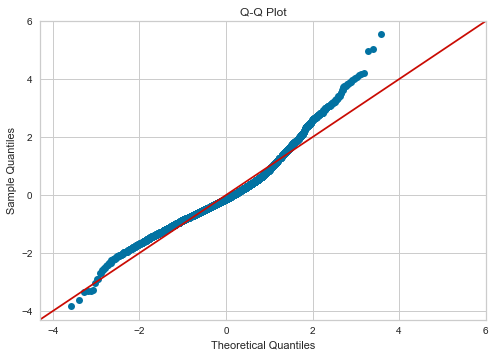

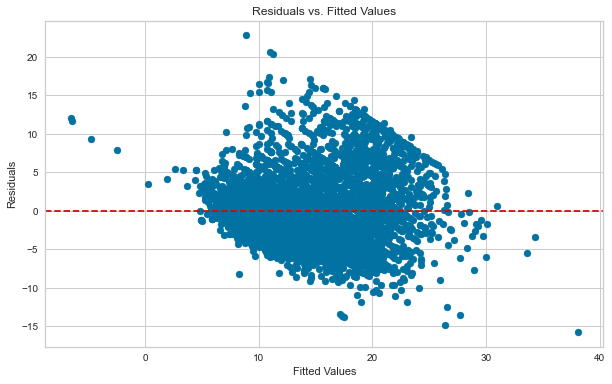

In [156]:
# Calculate residuals
residuals = sqrtreg_z2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit = True, line = '45')
plt.title('Q-Q Plot')
plt.show()

# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg_z2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y = 0, color = 'r', linestyle = '--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

# Clustering

In [147]:
df2 = airbnb.drop(columns = ['space', 'description', 'amenities', 'review_scores_rating', 'review_scores_accuracy', 
                             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                             'review_scores_location', 'review_scores_value', 'filled', 'mostly_filled',
                             'availability_30', 'availability_60', 'availability_365'])

In [148]:
# df2 = airbnb.drop(columns = ['cluster'])

In [149]:
df2['security_deposit'].fillna(0, inplace = True)

df2['cleaning_fee'].fillna(0, inplace = True)

In [150]:
df2 = df2.select_dtypes(include = ['int','float64','bool'])

In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       5835 non-null   bool   
 1   host_listings_count     5835 non-null   float64
 2   host_has_profile_pic    5835 non-null   bool   
 3   host_identity_verified  5835 non-null   bool   
 4   accommodates            5835 non-null   int64  
 5   bathrooms               5835 non-null   float64
 6   bedrooms                5835 non-null   float64
 7   beds                    5835 non-null   float64
 8   price                   5835 non-null   float64
 9   security_deposit        5835 non-null   float64
 10  cleaning_fee            5835 non-null   float64
 11  guests_included         5835 non-null   int64  
 12  extra_people            5835 non-null   float64
 13  minimum_nights          5835 non-null   int64  
 14  availability_90         5835 non-null   

In [152]:
# Standardize Data using StandardScaler

dfcolumns = df2.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df2.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)

df_scaled.head()

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,number_of_reviews,price_per_person,availability_90_pct,booked,cluster
0,-0.406655,-0.194959,0.069439,-1.432960,0.599453,1.325490,-0.649428,0.478564,0.034271,-0.190531,-0.500609,-0.496572,-0.458426,-0.018229,-1.595780,-0.385566,-0.230905,-1.595780,1.499026,-0.442983
1,-0.406655,-0.194959,0.069439,0.697856,-0.888185,-1.910050,-0.649428,-0.735268,-0.464245,-0.170423,1.515154,-0.496572,-0.458426,0.160838,0.908488,-0.424930,-0.239243,0.908488,-0.667100,0.845555
2,-0.406655,-0.176805,0.069439,0.697856,-0.888185,0.031274,-0.649428,-0.735268,-0.461764,-0.190531,-0.500609,-0.496572,-0.458426,-0.197296,0.936626,-0.424930,-0.230905,0.936626,-0.667100,0.845555
3,-0.406655,-0.176805,0.069439,0.697856,-0.888185,0.031274,-0.649428,-0.735268,-0.461764,-0.190531,-0.500609,-0.496572,-0.458426,-0.197296,0.936626,-0.424930,-0.230905,0.936626,-0.667100,0.845555
4,-0.406655,5.251167,0.069439,0.697856,0.599453,0.678382,1.110633,0.478564,0.775843,-0.190531,2.858996,-0.496572,-0.458426,-0.018229,0.852213,-0.424930,0.600067,0.852213,-0.667100,-1.731521


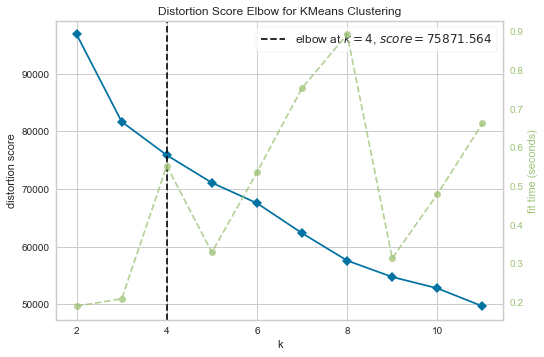

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

In [154]:
df_desc

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,number_of_reviews,price_per_person,availability_90_pct,booked
cluster,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,1.0,8.0,2.5,3.0,4.0,500.0,2.0,15.0,1.0,0.0,2.0,82.0,2.0,62.500,0.911111,0.0
1,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,125.0,0.0,2.0,1.0,0.0,1.0,87.0,3.0,42.500,0.966667,0.0
2,0.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,165.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,49.375,0.000000,1.0


In [144]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=3, random_state=904)
kmclus = kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

# append cluster to original data
df2['cluster'] = clusters

df2.info()

# Evaluate cluster sizes to insure that they are similar
print(df2['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = df2.groupby('cluster').mean()
print(df_desc)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       5835 non-null   bool   
 1   host_listings_count     5835 non-null   float64
 2   host_has_profile_pic    5835 non-null   bool   
 3   host_identity_verified  5835 non-null   bool   
 4   accommodates            5835 non-null   int64  
 5   bathrooms               5835 non-null   float64
 6   bedrooms                5835 non-null   float64
 7   beds                    5835 non-null   float64
 8   price                   5835 non-null   float64
 9   security_deposit        5835 non-null   float64
 10  cleaning_fee            5835 non-null   float64
 11  guests_included         5835 non-null   int64  
 12  extra_people            5835 non-null   float64
 13  minimum_nights          5835 non-null   int64  
 14  availability_90         5835 non-null   

In [145]:
# Examine the means of each variable by cluster
df_desc = df2.groupby('cluster').median()
df_desc

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,number_of_reviews,price_per_person,availability_90_pct,booked
cluster,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,1.0,8.0,2.5,3.0,4.0,500.0,2.0,15.0,1.0,0.0,2.0,82.0,2.0,62.500,0.911111,0.0
1,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,125.0,0.0,2.0,1.0,0.0,1.0,87.0,3.0,42.500,0.966667,0.0
2,0.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,165.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,49.375,0.000000,1.0


In [79]:
airbnb['cluster'] = df2['cluster']

In [92]:
cluster0 = airbnb[airbnb['cluster'] == 0].reset_index(drop=True)

In [93]:
cluster1 = airbnb[airbnb['cluster'] == 1].reset_index(drop=True)

In [94]:
cluster2 = airbnb[airbnb['cluster'] == 2].reset_index(drop=True)

In [97]:
property_type = pd.crosstab(airbnb['cluster'],
                            airbnb['property_type'])
property_type

property_type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Earth House,House,Hut,Loft,Other,Tent,Tipi,Townhouse,Treehouse,Villa
cluster,,,,,,,,,,,,,,,,,,
0,51,0,0,0,0,2,0,8,0,1014,0,7,2,4,0,8,0,3
1,715,3,0,5,4,6,0,47,0,794,0,23,14,2,0,17,0,1
2,1089,34,1,13,13,26,1,51,2,1742,1,53,31,5,1,32,7,3


In [98]:
room_type = pd.crosstab(airbnb['cluster'],
                        airbnb['room_type'])
room_type

room_type,Entire home/apt,Private room,Shared room
cluster,,,
0,1096,1,2
1,1205,398,28
2,1759,1253,93


In [100]:
bed_type = pd.crosstab(airbnb['cluster'],
                       airbnb['bed_type'])
bed_type

bed_type,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
cluster,,,,,
0,4,0,1,0,1094
1,19,6,16,7,1583
2,59,18,57,15,2956


In [103]:
cancellation_policy = pd.crosstab(airbnb['cluster'],
                                   airbnb['cancellation_policy'])
cancellation_policy

cancellation_policy,flexible,moderate,no_refunds,strict,super_strict_30
cluster,,,,,
0,192,183,1,721,2
1,754,367,0,509,1
2,1215,770,0,1114,6


cluster
0    9.616644
1    9.673961
2    9.643495
Name: review_scores_accuracy, dtype: float64


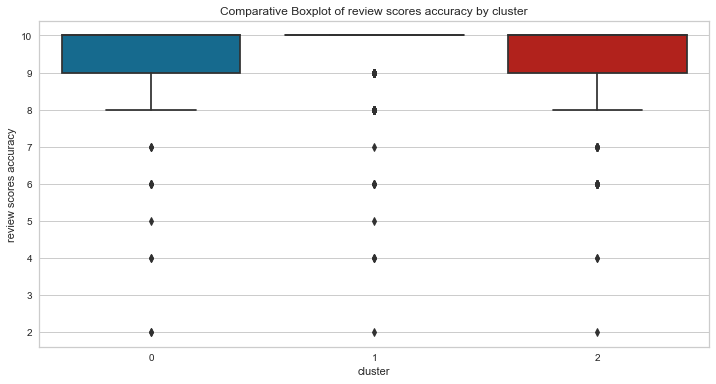

In [111]:
# Examine dummy variable: Look at price vs room_type

print(airbnb.groupby('cluster')['review_scores_accuracy'].agg('mean'))

plt.figure(figsize = (12,6))
sns.boxplot(data = airbnb,
            x = "cluster",
            y = "review_scores_accuracy")

# Add labels and a title
plt.xlabel('cluster')
plt.ylabel('review scores accuracy')
plt.title("Comparative Boxplot of review scores accuracy by cluster")hi

# Show the plot
plt.show()